In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import tqdm
from time import sleep
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name


In [15]:
from matplotlib.patches import Circle, Rectangle, Arc

# Amazing function by Bradley Fay for plotting the nba court
# source: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
def draw_court(ax=None, color='black', lw=2, background_color="#EBEBE8", outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.13, theta2=157.87, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-249, -48), 498, 470, linewidth=lw,
                            color=color, fill=None)
    court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [16]:
player_id = find_players_by_full_name('Chris Bosh')[0]['id']

In [17]:
seasons = [f"{season}-{str(season+1)[-2:]}" for season in range(2003, 2016)]

In [19]:
assist_data_frames = []
for season in tqdm.tqdm(seasons, desc='Iterating Seasons...'):
    season_assists = []
    shot_chart = ShotChartDetail(team_id=0, player_id=player_id, season_nullable=season, context_measure_simple="FGM")
    shot_df = shot_chart.get_data_frames()[0]
    shot_df.loc[:, 'SEASON'] = season
    #game_finder = LeagueGameFinder(player_id_nullable=lebron_id, player_or_team_abbreviation='P', season_nullable=season)
    #games_df = game_finder.get_data_frames()[0]
    assist_data_frames.append(shot_df)
    sleep(0.2)

Iterating Seasons...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.79it/s]


In [20]:
all_dfs = pd.concat(assist_data_frames, ignore_index=True)

In [42]:
colors =[
    "#CE1141",
    "#CE1141",
    "#CE1141",
    "#CE1141",
    "#CE1141",
    "#CE1141",
    "#CE1141",
    "#000000",
    "#000000",
    "#000000",
    "#000000",
    "#000000",
    "#000000"
]

edge_colors = [
    "#222222",
    "#222222",
    "#222222",
    "#222222",
    "#222222",
    "#222222",
    "#222222",
    "#98002E",
    "#98002E",
    "#98002E",
    "#98002E",
    "#98002E",
    "#98002E"
]

In [34]:
data_frame = all_dfs

In [39]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers, FFMpegWriter

from matplotlib import animation as manimation

In [40]:
plt.style.use('fivethirtyeight')

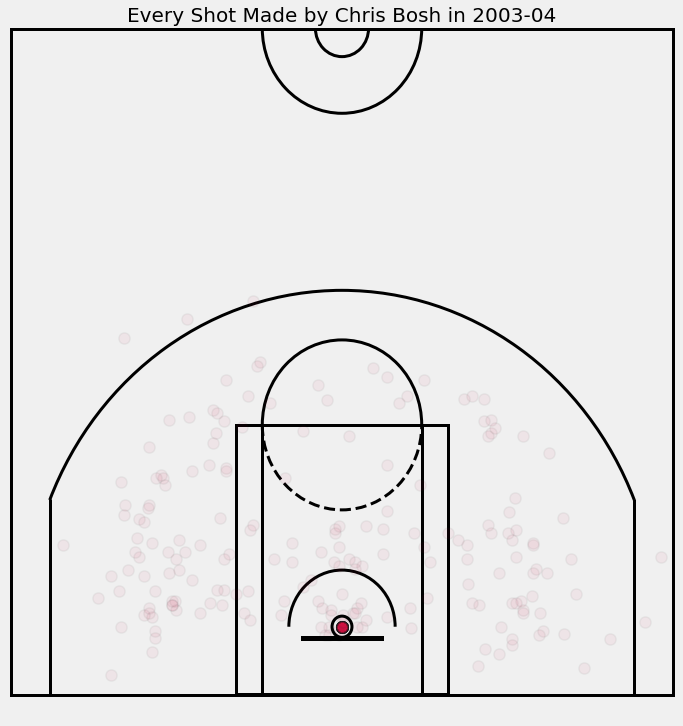

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
draw_court(ax=ax,outer_lines=True, lw=3)

def plot_shot_chart(frame):
    
    ax.clear()
    index = frame // 60
    mod = frame % 60

    season = seasons[index]
    color = colors[index]
    edge_color = edge_colors[index]
    #print(index)
    i=0
    while i < index:
        curr_season = data_frame.loc[data_frame.SEASON == seasons[i]]
        color = colors[i]
        made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]
        alpha=0.025
        paths = ax.scatter(
            x=made_shots.LOC_X,
            y=made_shots.LOC_Y,
            marker='o',
            c=color,
            s=125,
            alpha=alpha,
            edgecolors=edge_color,
            linewidths=1.5
        )
        i+=1


    curr_season = data_frame.loc[data_frame.SEASON == seasons[index]]
    color = colors[index]
    made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]

    alpha = (mod+1) * 0.052
    if mod > 18:
        alpha = 1.0
    if mod > 40:
        alpha = 1.0 - (mod - 40) *  0.052

    paths = ax.scatter(
        x=made_shots.LOC_X,
        y=made_shots.LOC_Y,
        marker='o',
        c=color,
        s=125,
        alpha=alpha,
        edgecolors=edge_color,
        linewidths=1.5
    )

    if mod >=55 and index < len(seasons)-1:
        curr_season = data_frame.loc[data_frame.SEASON == seasons[index+1]]
        made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]
        color = colors[index+1]
        alpha=0.01 * (mod - 55 + 1)
        paths = ax.scatter(
            x=made_shots.LOC_X,
            y=made_shots.LOC_Y,
            marker='o',
            c=color,
            s=125,
            alpha=alpha,
            edgecolors=edge_color,
            linewidths=1.5
        )

            # Changing court color
    ax.set_facecolor('#F6F6F6')

    #plt.xticks(np.arange(-250, 251, 20))
    #plt.yticks(np.arange(-50, 490, 20))
    # Removing ticks
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.grid(False)
    ax.set_frame_on(False)

    # Title
    plt.title(f"Every Shot Made by Chris Bosh in {seasons[index]}", size=20)
    draw_court(ax=ax,outer_lines=True, lw=3)

    # Drawing court
    ax.set_xlim(-252,252)
    ax.set_ylim(-65,423)
    

fig.subplots_adjust(left=0.03, bottom=0, right=0.96, top=0.96, wspace=None, hspace=None)

animation = FuncAnimation(fig=fig, func=plot_shot_chart, frames=60 * len(seasons), interval=33.3333, repeat_delay=3000)
animation.save("chris_bosh_all_shots_2.gif", writer='imagemagick')


## PASCAL SIAKAM AKA SPICY P

In [16]:
player_id = find_players_by_full_name('Pascal Siakam')[0]['id']

In [17]:
seasons = [f"{season}-{str(season+1)[-2:]}" for season in range(2017, 2020)]

In [18]:
assist_data_frames = []
for season in tqdm.tqdm(seasons, desc='Iterating Seasons...'):
    season_assists = []
    shot_chart = ShotChartDetail(team_id=0, player_id=player_id, season_nullable=season, context_measure_simple="FGM")
    shot_df = shot_chart.get_data_frames()[0]
    shot_df.loc[:, 'SEASON'] = season
    #game_finder = LeagueGameFinder(player_id_nullable=lebron_id, player_or_team_abbreviation='P', season_nullable=season)
    #games_df = game_finder.get_data_frames()[0]
    assist_data_frames.append(shot_df)
    sleep(0.2)

all_dfs = pd.concat(assist_data_frames, ignore_index=True)


Iterating Seasons...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.50s/it]


In [19]:
all_dfs = pd.concat(assist_data_frames, ignore_index=True)

In [20]:
colors =[
    "#CE1141",
    "#CE1141",
    "#CE1141",
]

edge_colors = [
    "#000000",
    "#000000",
    "#000000",
]

In [21]:
data_frame = all_dfs

from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers, FFMpegWriter

from matplotlib import animation as manimation

In [22]:
plt.style.use('fivethirtyeight')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
draw_court(ax=ax,outer_lines=True, lw=3)

def plot_shot_chart(frame):
    
    ax.clear()
    index = frame // 60
    mod = frame % 60

    season = seasons[index]
    color = colors[index]
    edge_color = edge_colors[index]
    #print(index)
    i=0
    while i < index:
        curr_season = data_frame.loc[data_frame.SEASON == seasons[i]]
        color = colors[i]
        made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]
        alpha=0.025
        paths = ax.scatter(
            x=made_shots.LOC_X,
            y=made_shots.LOC_Y,
            marker='o',
            c=color,
            s=125,
            alpha=alpha,
            edgecolors=edge_color,
            linewidths=1.5
        )
        i+=1

    if index > len(seasons):
        curr_season = data_frame
        title_text = "last three seasons"
    else:
        title_text = seasons[index]
        curr_season = data_frame.loc[data_frame.SEASON == seasons[index]]
    color = colors[index-1]
    made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]

    alpha = (mod+1) * 0.052
    if mod > 18:
        alpha = 1.0
    if mod > 40:
        alpha = 1.0 - (mod - 40) *  0.052

    paths = ax.scatter(
        x=made_shots.LOC_X,
        y=made_shots.LOC_Y,
        marker='o',
        c=color,
        s=125,
        alpha=alpha,
        edgecolors=edge_color,
        linewidths=1.5
    )

    if mod >=55 and index < len(seasons)-1:
        curr_season = data_frame.loc[data_frame.SEASON == seasons[index+1]]
        made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]
        color = colors[index+1]
        alpha=0.01 * (mod - 55 + 1)
        paths = ax.scatter(
            x=made_shots.LOC_X,
            y=made_shots.LOC_Y,
            marker='o',
            c=color,
            s=125,
            alpha=alpha,
            edgecolors=edge_color,
            linewidths=1.5
        )

            # Changing court color
    ax.set_facecolor('#F6F6F6')

    #plt.xticks(np.arange(-250, 251, 20))
    #plt.yticks(np.arange(-50, 490, 20))
    # Removing ticks
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.grid(False)
    ax.set_frame_on(False)

    # Title
    plt.title(f"Every Shot Made by Pascal Siakam in {title_text}", size=20)
    draw_court(ax=ax,outer_lines=True, lw=3)

    # Drawing court
    ax.set_xlim(-252,252)
    ax.set_ylim(-65,423)
    

fig.subplots_adjust(left=0.03, bottom=0, right=0.96, top=0.96, wspace=None, hspace=None)

animation = FuncAnimation(fig=fig, func=plot_shot_chart, frames=60 * len(seasons), interval=33.3333, repeat_delay=7000)
animation.save("pascal_siakam_2.gif", writer='imagemagick')
